# Разведывание данных об успеваемости студентов по матиматике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

student_df = pd.read_csv('stud_math.xls')

## Предобработка

In [2]:
def get_hist(column):
    '''Функция для распределения данных'''
    sns.set()
    sns.countplot(student_df.loc[:, column])
    plt.show()

In [3]:
def count_value_info(col):
    '''Подсчет значений'''
    print('Колонка:{}'.format(col, display(pd.DataFrame(student_df.loc[:, col].value_counts(
    ))), sep='/t'), 'Пустых значений:{}'.format(student_df.loc[:, col].isna().sum()))

In [4]:
def stat_info(col):
    '''Подсчет границ выбросов и вывод гисторгаммы'''
    perc25 = student_df.loc[:, col].quantile(q=0.25, interpolation='midpoint')
    perc75 = student_df.loc[:, col].quantile(q=0.75, interpolation='midpoint')
    IQR = perc75-perc25
    print('Колонка:{}'.format(col), "Границы выбросов: [{f}, {l}].".format(
        f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    sns.countplot(student_df.loc[:, col])
    plt.show()

In [5]:
def get_boxplot(column):
    '''Вывод боксплотов'''
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.boxplot(x=column, y='score',
                data=student_df.loc[student_df.loc[:, column].isin(
                    student_df.loc[:, column].value_counts().index[:100])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [6]:
def get_stat_dif(column):
    '''Статистические различия для номинативных данных'''
    cols =student_df.loc[:, column].value_counts().index[:100]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(student_df.loc[student_df.loc[:, column] == comb[0], 'score'], 
                        student_df.loc[student_df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

## Этап 1. Исследование данных

In [7]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [11]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [12]:
student_df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [9]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [10]:
student_df.rename({'studytime, granular': 'granular'}, axis=1, inplace=True)

In [13]:
student_df[student_df.granular==-3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,-3.0,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,home,father,1.0,1.0,0.0,no,no,NaN,yes,yes,-3.0,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Колонка granular очень похоже что это studytime умноженное на -3, предполагаю, что можно обойтись без нее

In [14]:
student_df=student_df.drop('granular',axis=1)

## Этап 2. Очистка 

In [15]:
float_df = student_df.select_dtypes(include=['float64'])

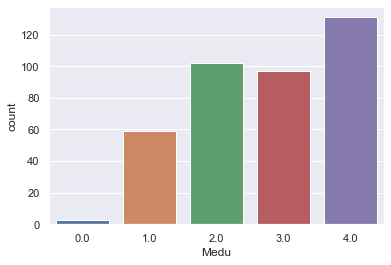

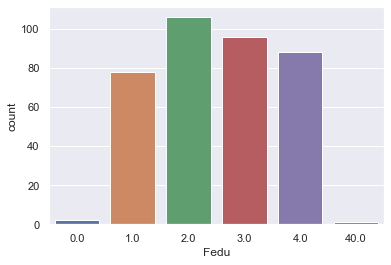

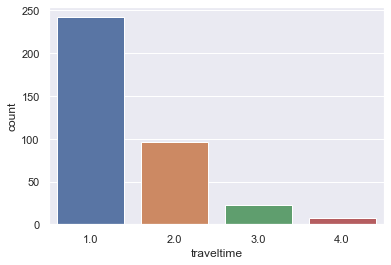

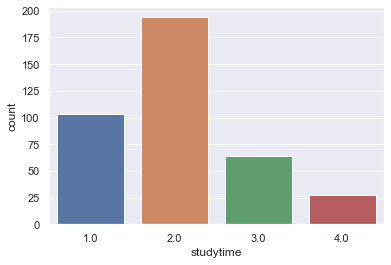

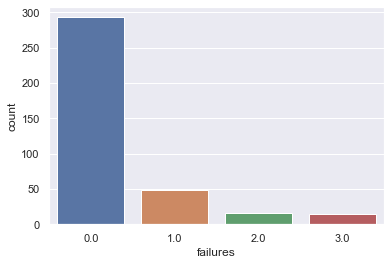

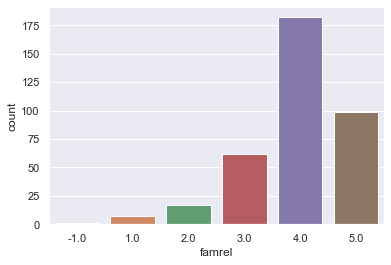

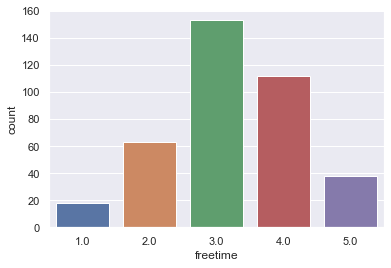

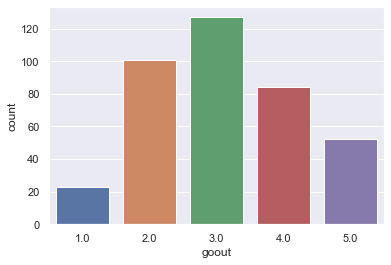

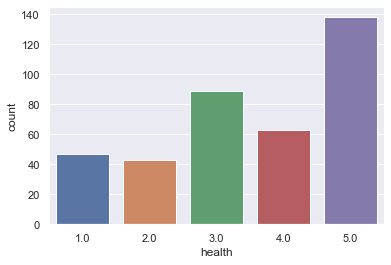

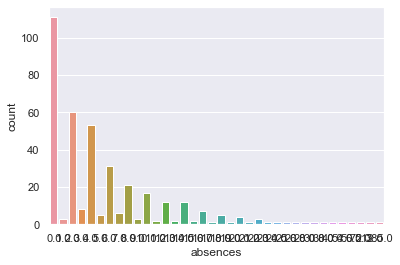

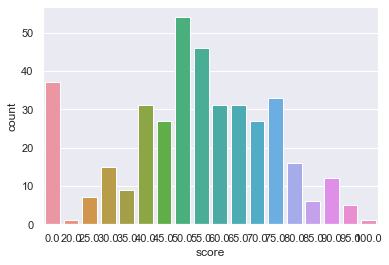

In [16]:
for col in float_df:
    get_hist(col)

In [17]:
for col in student_df:
    count_value_info(col)

,school
GP,349
MS,46


Колонка:school Пустых значений:0


,sex
F,208
M,187


Колонка:sex Пустых значений:0


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Колонка:age Пустых значений:0


,address
U,295
R,83


Колонка:address Пустых значений:17


,famsize
GT3,261
LE3,107


Колонка:famsize Пустых значений:27


,Pstatus
T,314
A,36


Колонка:Pstatus Пустых значений:45


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Колонка:Medu Пустых значений:3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Колонка:Fedu Пустых значений:24


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Колонка:Mjob Пустых значений:19


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Колонка:Fjob Пустых значений:36


,reason
course,137
home,104
reputation,103
other,34


Колонка:reason Пустых значений:17


,guardian
mother,250
father,86
other,28


Колонка:guardian Пустых значений:31


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Колонка:traveltime Пустых значений:28


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Колонка:studytime Пустых значений:7


,failures
0.0,293
1.0,49
2.0,16
3.0,15


Колонка:failures Пустых значений:22


,schoolsup
no,335
yes,51


Колонка:schoolsup Пустых значений:9


,famsup
yes,219
no,137


Колонка:famsup Пустых значений:39


,paid
no,200
yes,155


Колонка:paid Пустых значений:40


,activities
yes,195
no,186


Колонка:activities Пустых значений:14


,nursery
yes,300
no,79


Колонка:nursery Пустых значений:16


,higher
yes,356
no,19


Колонка:higher Пустых значений:20


,internet
yes,305
no,56


Колонка:internet Пустых значений:34


,romantic
no,240
yes,124


Колонка:romantic Пустых значений:31


,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Колонка:famrel Пустых значений:27


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Колонка:freetime Пустых значений:11


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Колонка:goout Пустых значений:8


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Колонка:health Пустых значений:15


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Колонка:absences Пустых значений:12


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


Колонка:score Пустых значений:6


В столбце Fedu  есть значение 40 и famrel -1, можно предположить что это опечатки заменим значения.
Убирем пустые значения в score

In [18]:
student_df.Fedu = student_df.Fedu.apply(
    lambda x: float(str(x).replace('40', '4')))

In [19]:
student_df.famrel = student_df.famrel.apply(
    lambda x: float(str(x).replace('-1', '1')))

In [20]:
student_df.dropna(subset=["score"], inplace=True)

Колонка:Medu Границы выбросов: [-1.0, 7.0].


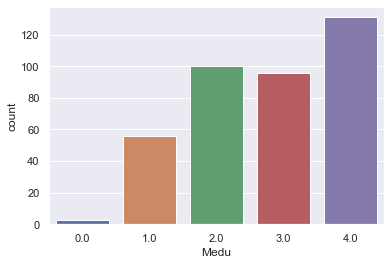

Колонка:Fedu Границы выбросов: [0.5, 4.5].


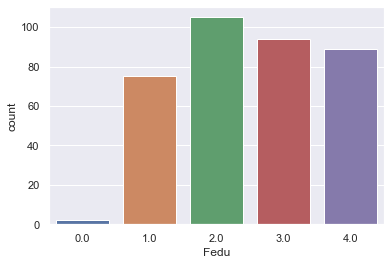

Колонка:traveltime Границы выбросов: [-0.5, 3.5].


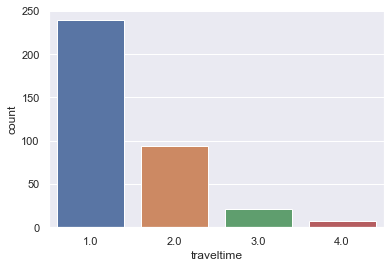

Колонка:studytime Границы выбросов: [-0.5, 3.5].


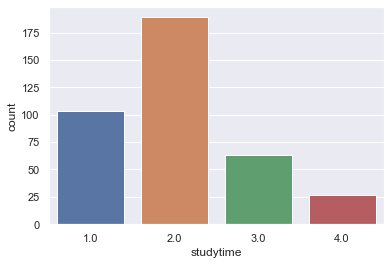

Колонка:failures Границы выбросов: [0.0, 0.0].


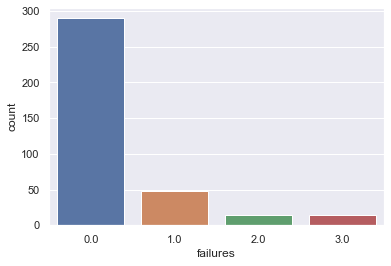

Колонка:famrel Границы выбросов: [2.5, 6.5].


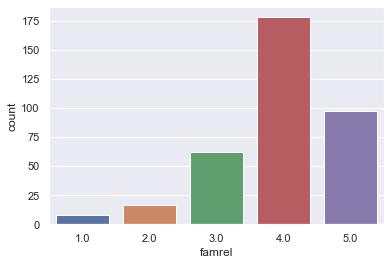

Колонка:freetime Границы выбросов: [1.5, 5.5].


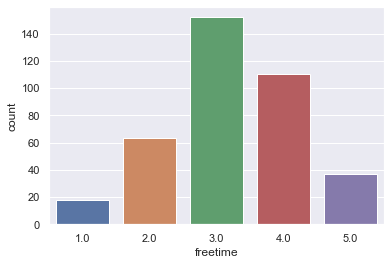

Колонка:goout Границы выбросов: [-1.0, 7.0].


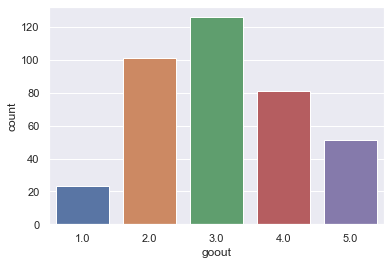

Колонка:health Границы выбросов: [0.0, 8.0].


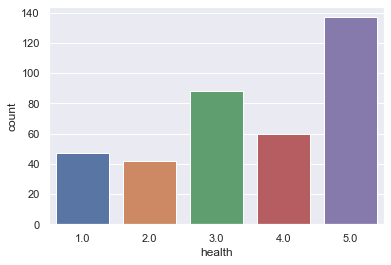

Колонка:absences Границы выбросов: [-12.0, 20.0].


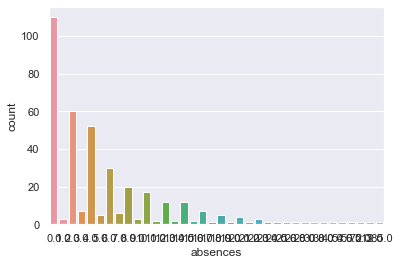

Колонка:score Границы выбросов: [-5.0, 115.0].


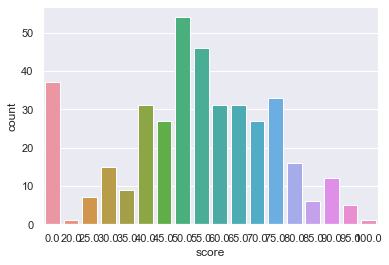

In [21]:
for col in float_df:
    stat_info(col)

Границы выбросов в нашем случае не совсем отражают реальность

В колонке пропусков имеются экстремально большие числа 212 и 358 Если посмотреть то студент с спропусками в 358 получил 85 балло что выше среднего , отфильтруем датасет 

In [22]:
perc25 = student_df.absences.quantile(q=0.25, interpolation='midpoint')
perc75 = student_df.absences.quantile(q=0.75, interpolation='midpoint')
IQR=perc75-perc25
student_df=student_df.loc[student_df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

## Этап 3. Анализ 

In [23]:
student_df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164627,-0.170310,0.072970,0.000417,0.179170,0.053881,0.043196,0.127582,-0.064051,0.155469,-0.159306
Medu,-0.164627,1.000000,0.625902,-0.189973,0.087904,-0.240567,-0.012270,0.041438,0.058623,-0.055584,0.066439,0.210257
Fedu,-0.170310,0.625902,1.000000,-0.132867,0.009432,-0.284939,-0.020295,-0.012527,0.040273,0.019340,-0.024235,0.113379
traveltime,0.072970,-0.189973,-0.132867,1.000000,-0.097291,0.064499,-0.036739,-0.012274,0.022589,0.001935,-0.050613,-0.074045
studytime,0.000417,0.087904,0.009432,-0.097291,1.000000,-0.176952,0.030359,-0.139698,-0.036747,-0.089648,-0.075454,0.113113
failures,0.179170,-0.240567,-0.284939,0.064499,-0.176952,1.000000,-0.002008,0.088810,0.080343,0.099425,0.076537,-0.329542
famrel,0.053881,-0.012270,-0.020295,-0.036739,0.030359,-0.002008,1.000000,0.174062,0.087324,0.083251,-0.092902,0.061516
freetime,0.043196,0.041438,-0.012527,-0.012274,-0.139698,0.088810,0.174062,1.000000,0.286959,0.040573,0.096281,0.034952
goout,0.127582,0.058623,0.040273,0.022589,-0.036747,0.080343,0.087324,0.286959,1.000000,0.005389,0.113048,-0.122246
health,-0.064051,-0.055584,0.019340,0.001935,-0.089648,0.099425,0.083251,0.040573,0.005389,1.000000,-0.013156,-0.057202


Пропуски  занятий положительная корреляция  с баллами это противоречит логике

In [24]:
text_column=student_df.select_dtypes(include=['object'])

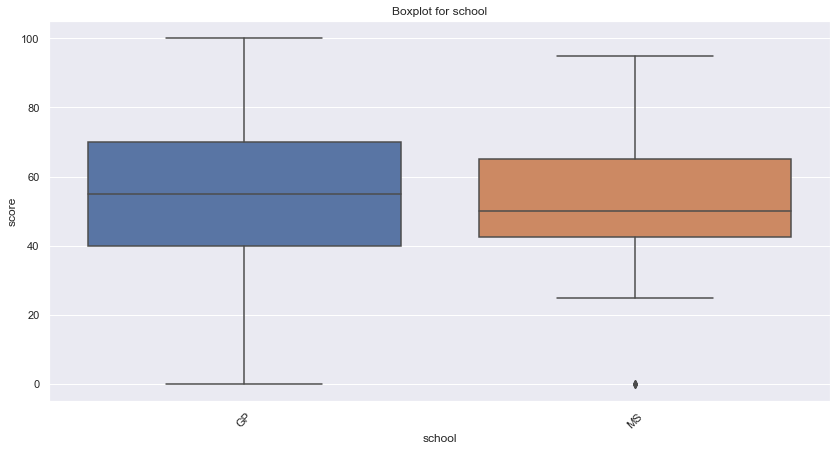

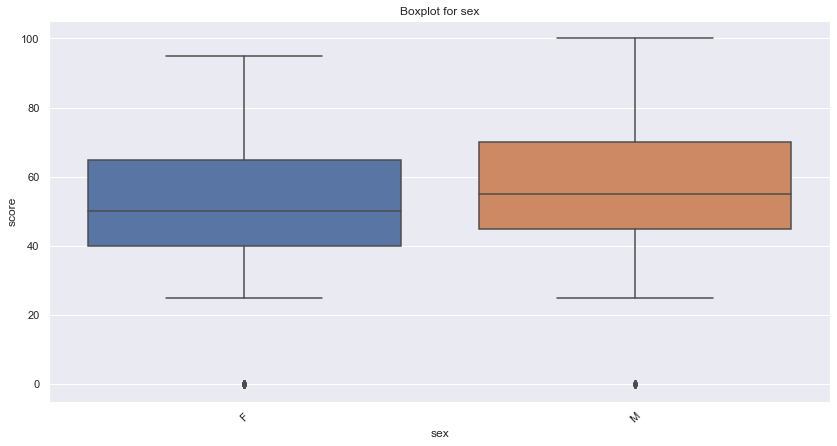

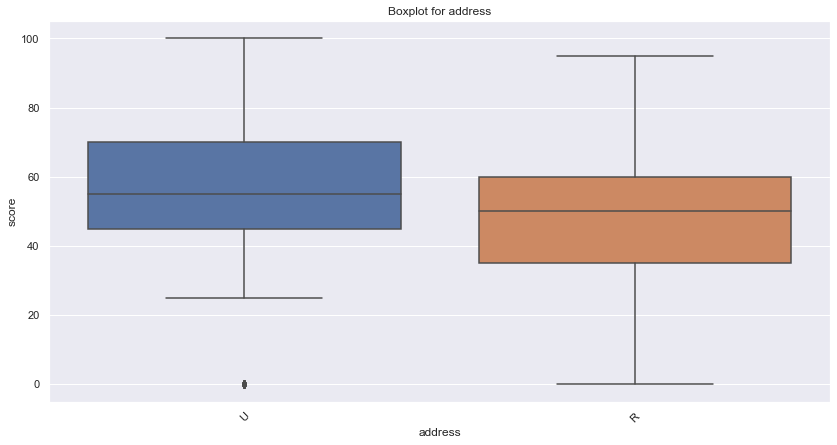

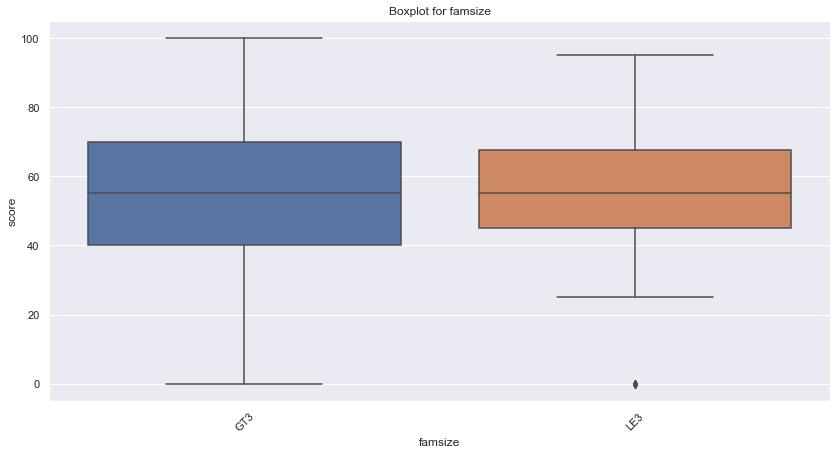

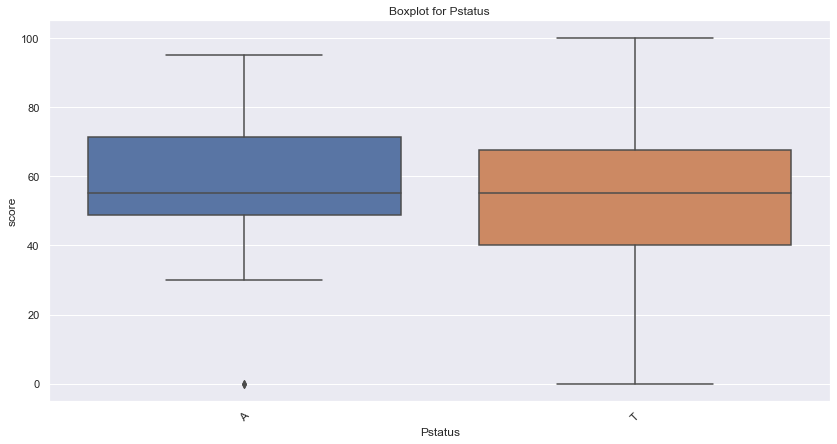

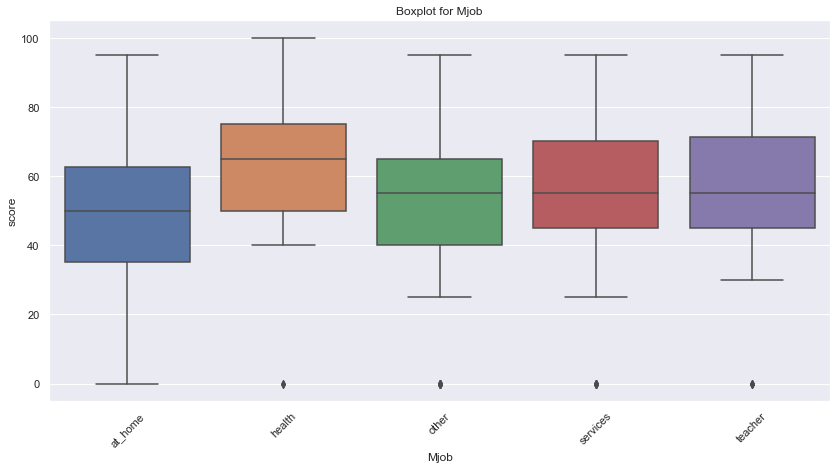

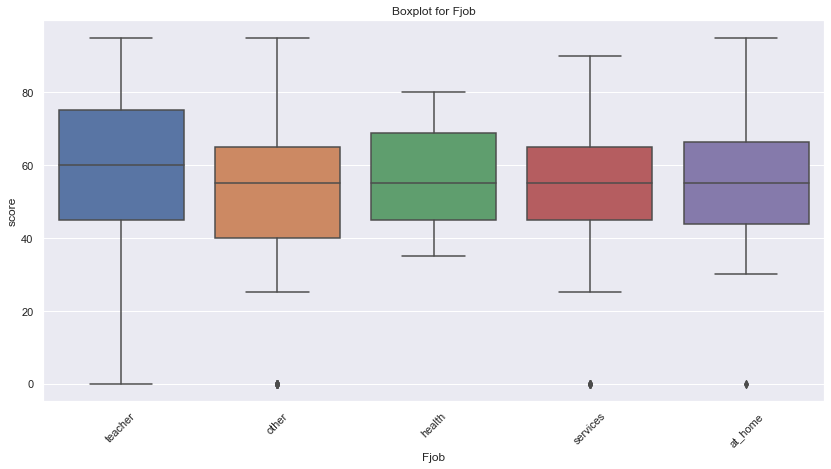

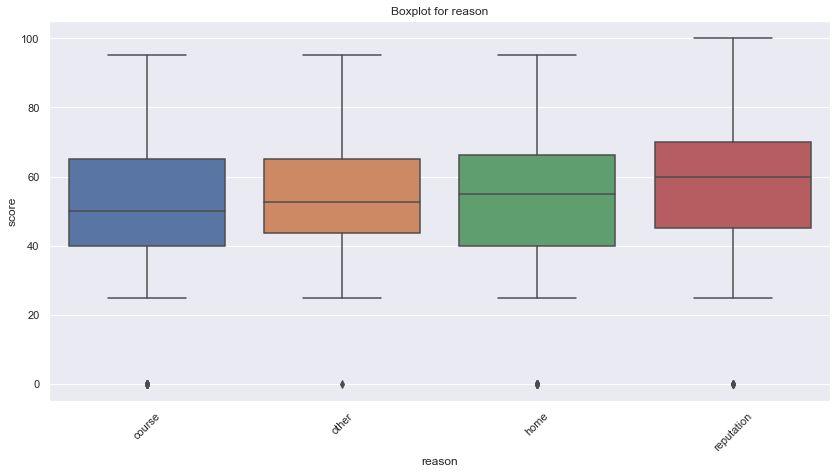

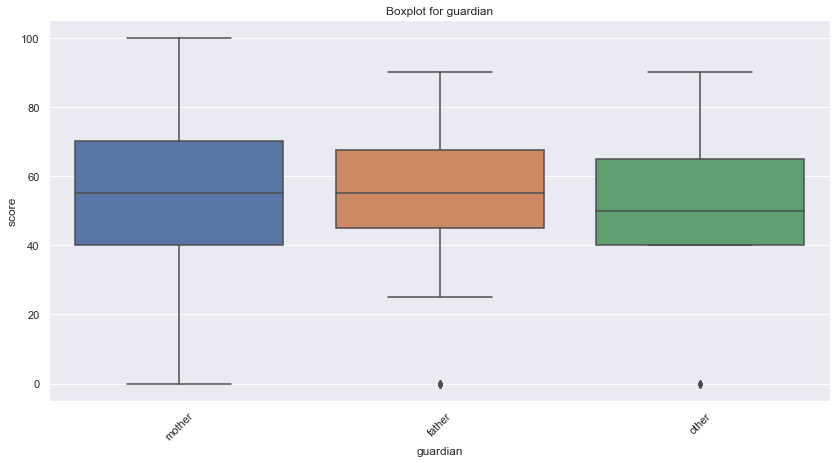

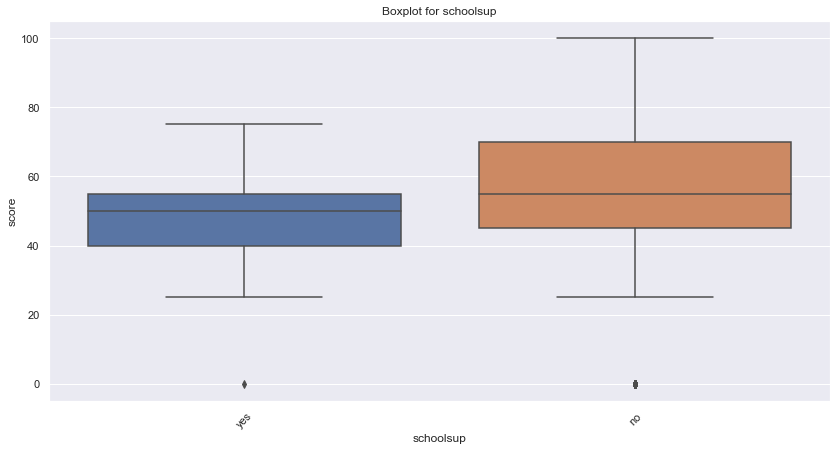

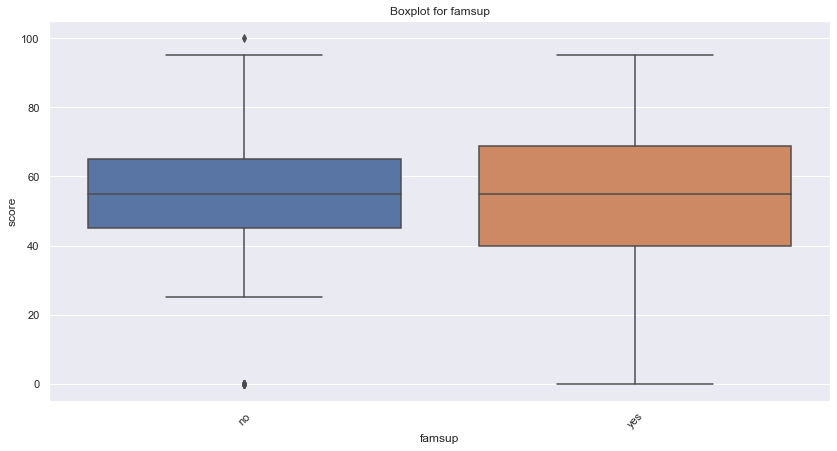

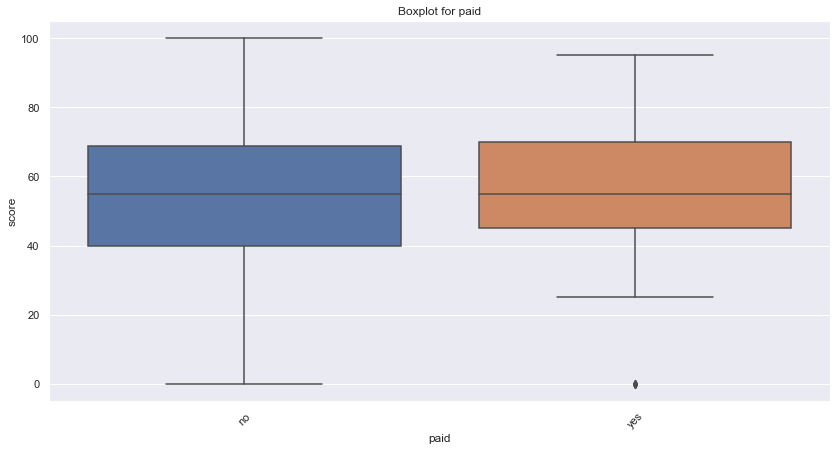

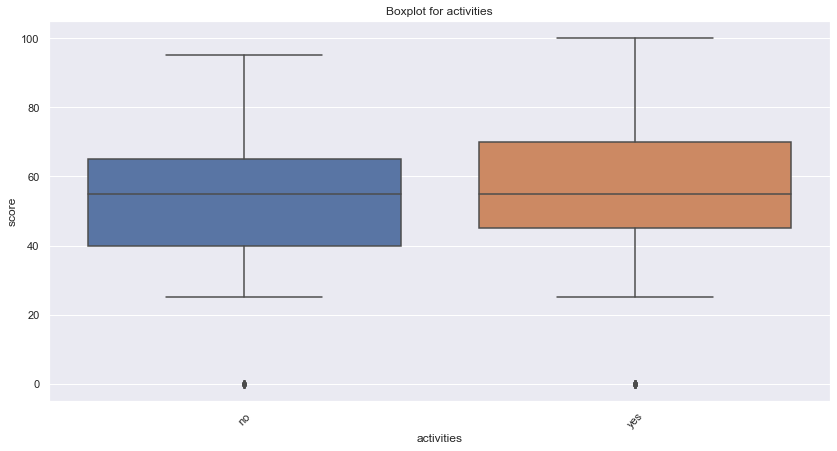

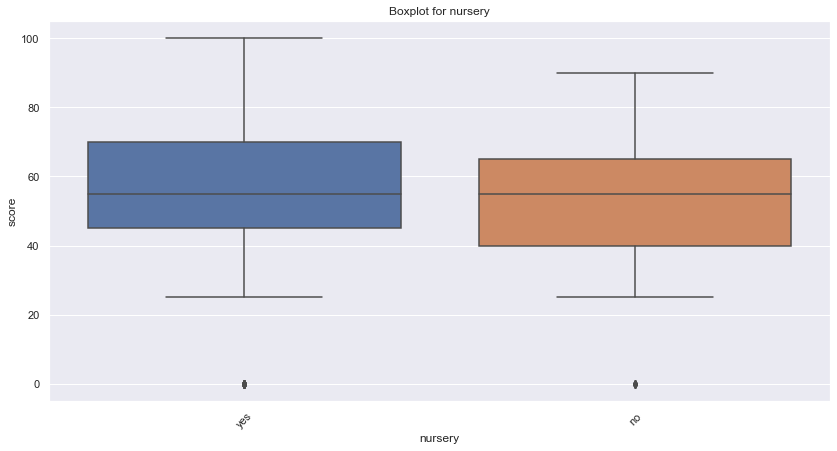

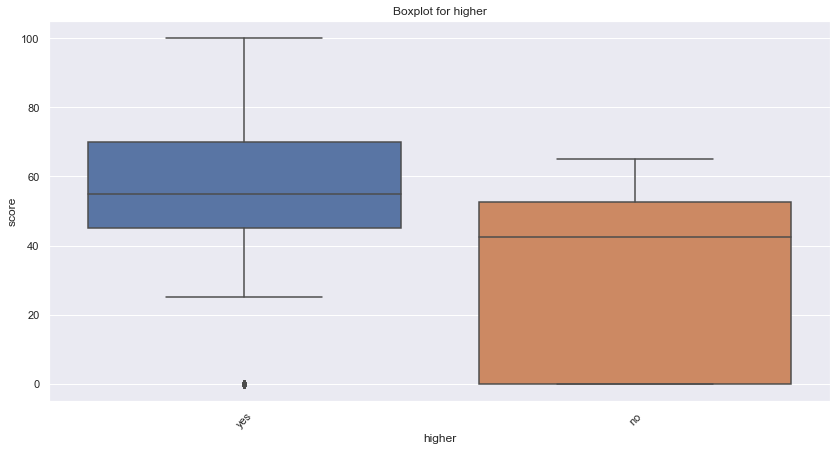

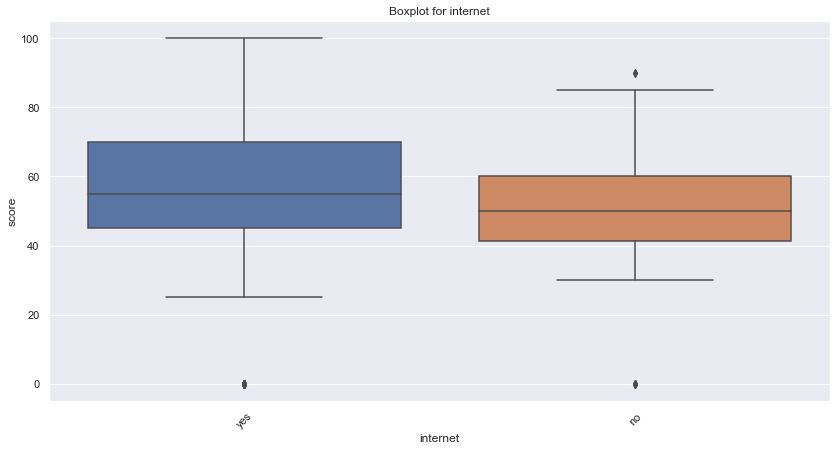

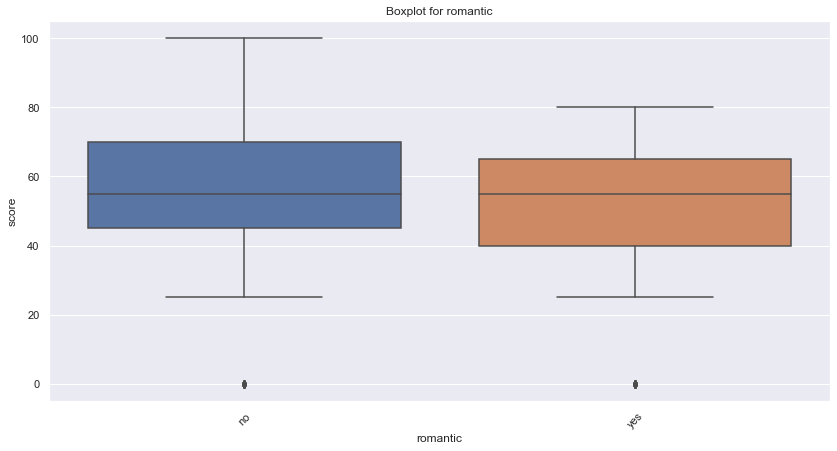

In [25]:
for col in text_column:
    get_boxplot(col)

Удивительно но оплата за дополнительные занятия по матиматике не дают видимого результата

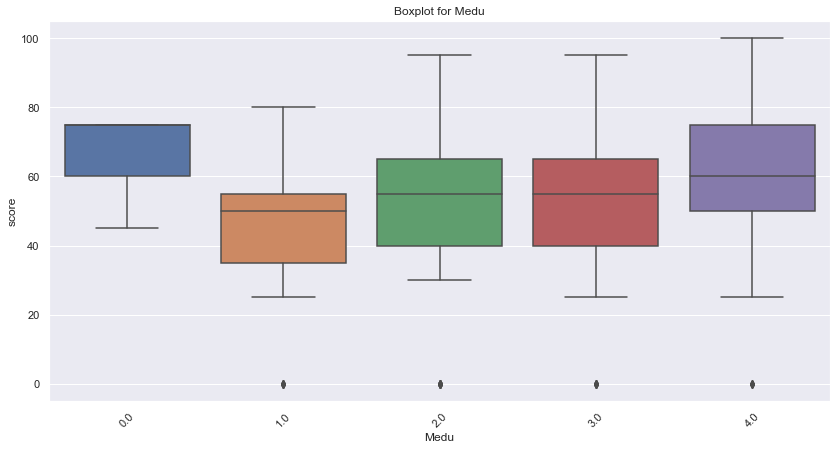

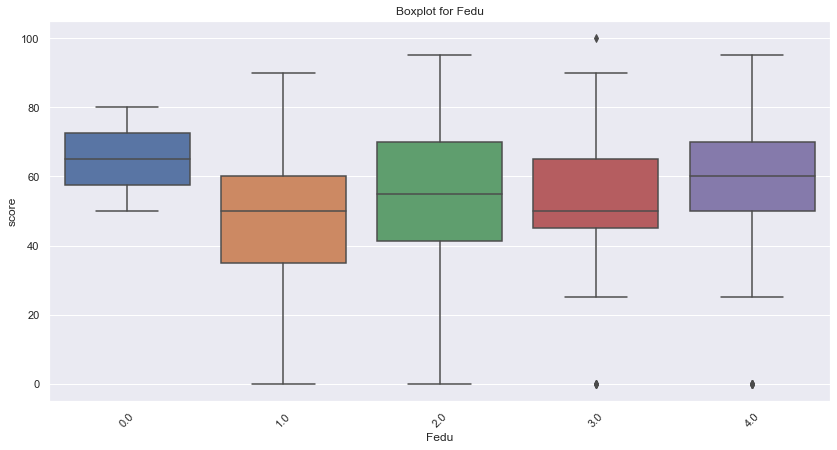

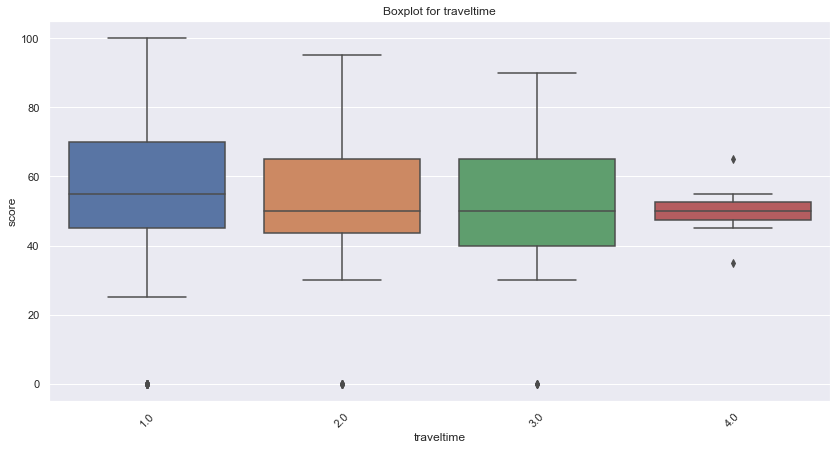

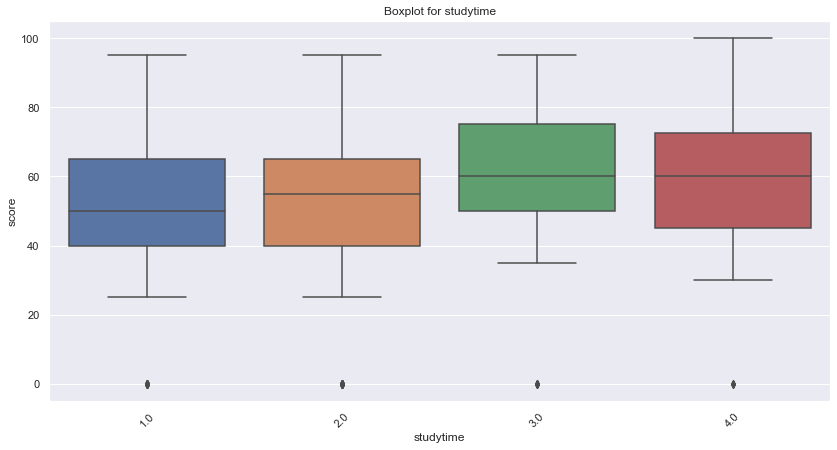

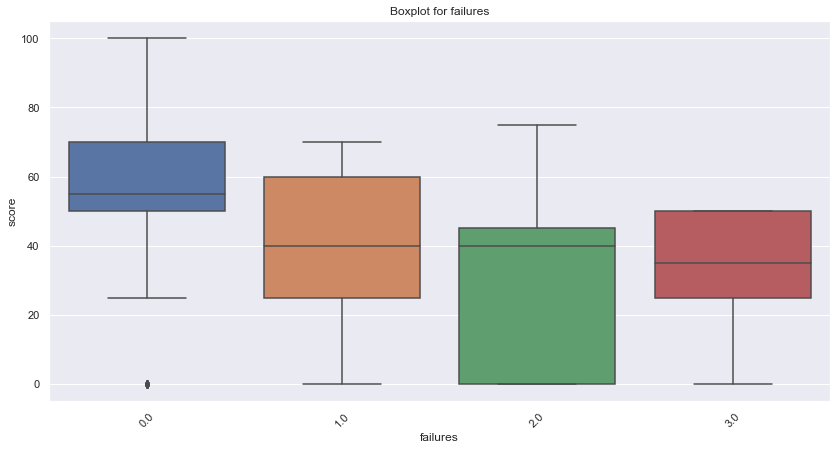

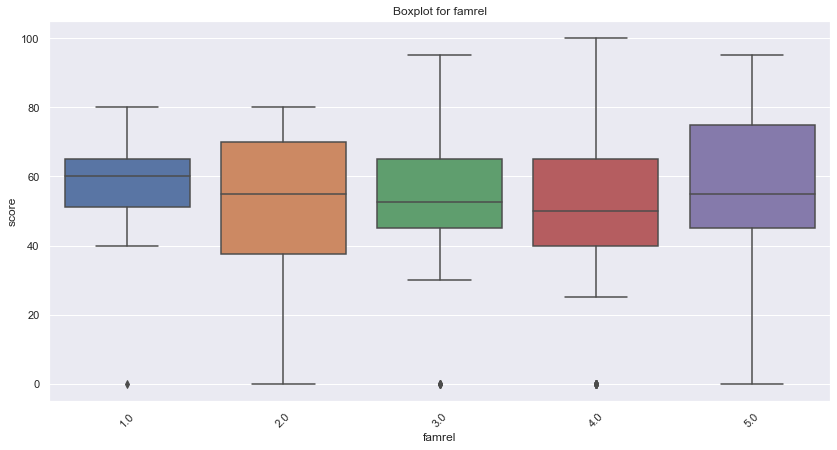

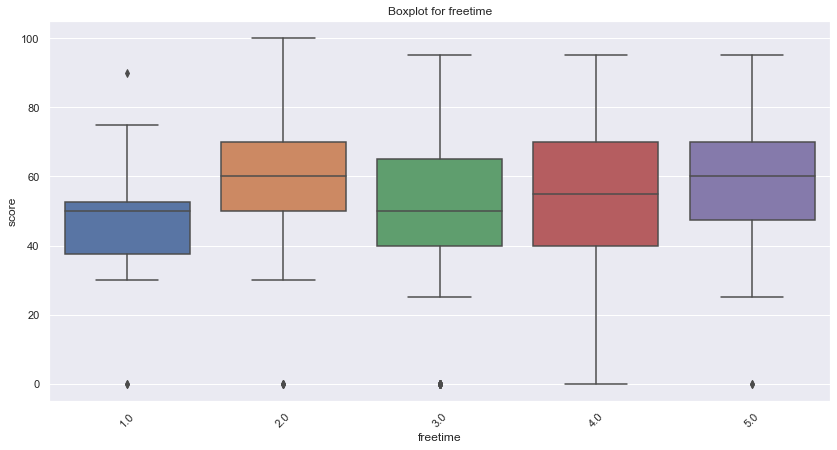

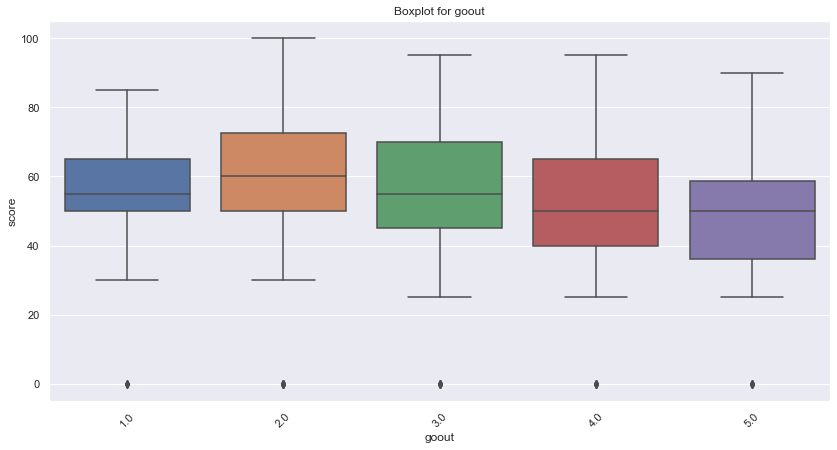

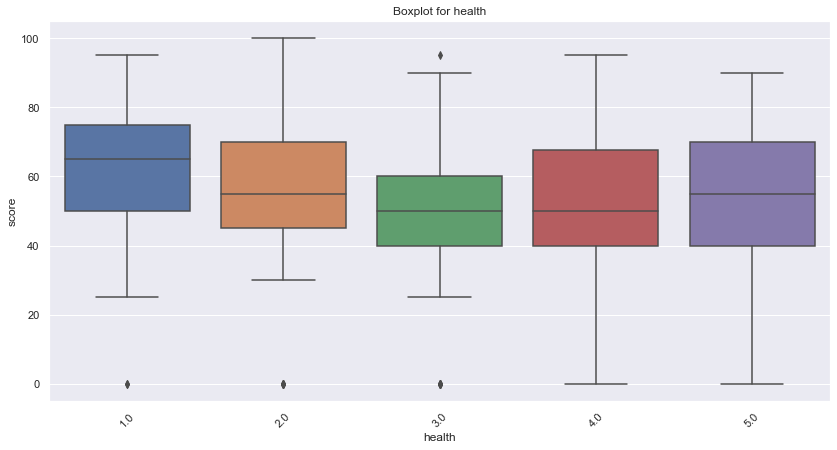

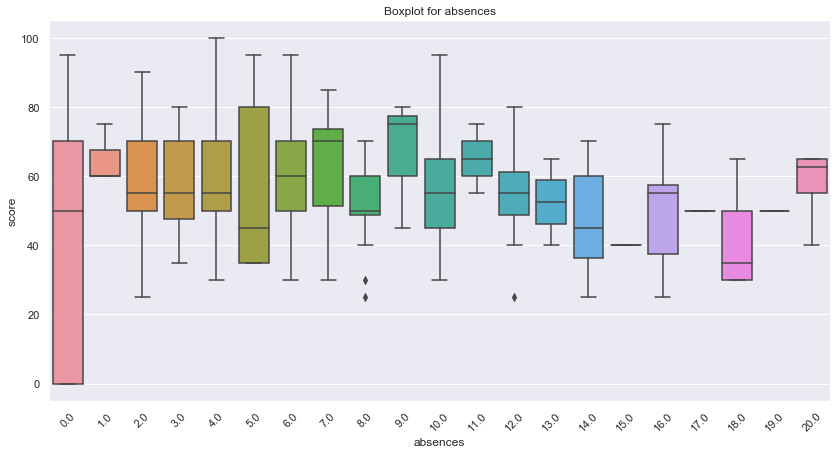

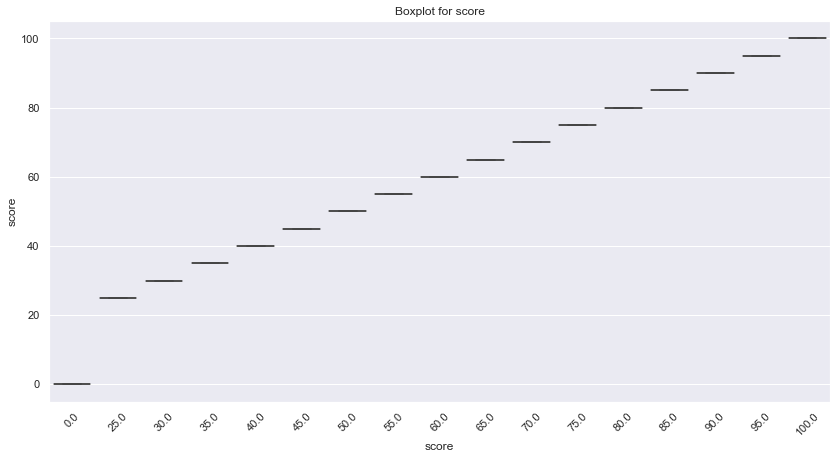

In [27]:
for col in float_df:
    get_boxplot(col)

Колонка:age Границы выбросов: [13.0, 21.0].


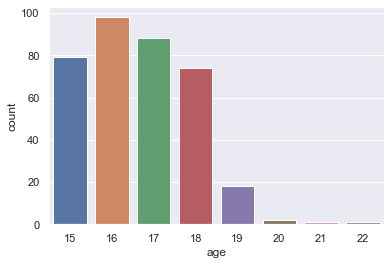

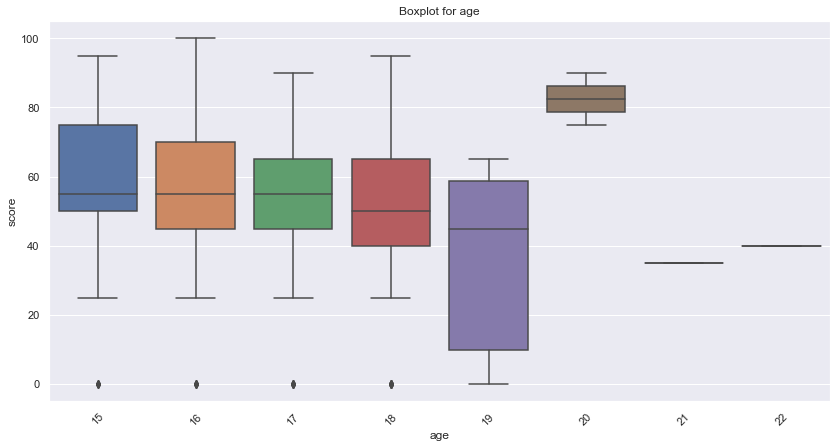

In [28]:
stat_info('age')
get_boxplot('age')

Во многих боксплотах 0 которые совершили 37 отмечены выбросами, очистим


In [35]:
student_df=student_df[student_df.score!=0]

In [36]:
for col in text_column:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


Mjob имеет статистическую значимость из за того , что большую часть опекунов занимают матери 

In [37]:
student_df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.144780,-0.153202,0.094408,0.006808,0.212319,0.060917,0.034407,0.136115,-0.048883,0.209530,-0.131938
Medu,-0.144780,1.000000,0.613110,-0.188091,0.082937,-0.217992,-0.004560,0.023265,0.056421,-0.047652,0.034569,0.197099
Fedu,-0.153202,0.613110,1.000000,-0.144013,-0.015271,-0.296472,-0.009861,-0.025354,0.022208,0.016929,-0.040331,0.133777
traveltime,0.094408,-0.188091,-0.144013,1.000000,-0.088687,0.102379,-0.028811,-0.006976,0.014037,0.015320,-0.044581,-0.077030
studytime,0.006808,0.082937,-0.015271,-0.088687,1.000000,-0.160046,0.055350,-0.144205,-0.014917,-0.098745,-0.094304,0.147275
failures,0.212319,-0.217992,-0.296472,0.102379,-0.160046,1.000000,0.003877,0.123916,0.114275,0.079806,0.172971,-0.280834
famrel,0.060917,-0.004560,-0.009861,-0.028811,0.055350,0.003877,1.000000,0.160845,0.046999,0.098629,-0.112595,0.068445
freetime,0.034407,0.023265,-0.025354,-0.006976,-0.144205,0.123916,0.160845,1.000000,0.283196,0.047108,0.090665,0.002375
goout,0.136115,0.056421,0.022208,0.014037,-0.014917,0.114275,0.046999,0.283196,1.000000,0.018898,0.131236,-0.188648
health,-0.048883,-0.047652,0.016929,0.015320,-0.098745,0.079806,0.098629,0.047108,0.018898,1.000000,-0.007110,-0.064667


Корреляция выглядит правдоподобно

## Отбор данных

In [44]:
student_model = student_df.loc[:, ['age', 'sex', 'address', 'Mjob',
                                   'schoolsup', 'failures', 'absences', 'goout', 'Medu', 'studytime']]

In [45]:
student_model = student_model.dropna()

In [46]:
student_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 393
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        264 non-null    int64  
 1   sex        264 non-null    object 
 2   address    264 non-null    object 
 3   Mjob       264 non-null    object 
 4   schoolsup  264 non-null    object 
 5   failures   264 non-null    float64
 6   absences   264 non-null    float64
 7   goout      264 non-null    float64
 8   Medu       264 non-null    float64
 9   studytime  264 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 22.7+ KB
